# Taller 6


#### Juan Andres Barrera Rodriguez
#### Daniel Felipe Segura Rincon
#### Andres Felipe Zuleta Romero


In [65]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [17]:
# Definir el tamaño al cual redimensionar las imágenes
IMAGE_SIZE = (256, 256)

# Ruta del dataset
dataset_path = 'Sample/'

# Cargar las imágenes
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_label, subfolder in enumerate(os.listdir(folder)):
        class_folder = os.path.join(folder, subfolder)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                try:
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(IMAGE_SIZE)
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(class_label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)






In [40]:
# Cargar el dataset
X, y = load_images_from_folder(dataset_path)

# Aplanar las imágenes para que puedan ser usadas por el MLPClassifier
X_flattened = X.reshape((X.shape[0], -1))

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [41]:
# Crear el modelo MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo
mlp.fit(X_train_pca, y_train)

# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test_pca)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.71      0.91      0.80        22

    accuracy                           0.73        37
   macro avg       0.75      0.69      0.69        37
weighted avg       0.74      0.73      0.71        37



In [49]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo
mlp2.fit(X_train_pca, y_train)

# Predecir en el conjunto de prueba
y_pred2 = mlp2.predict(X_test_pca)

# Evaluar el modelo
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.71      0.91      0.80        22

    accuracy                           0.73        37
   macro avg       0.75      0.69      0.69        37
weighted avg       0.74      0.73      0.71        37



c:\Users\Juan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
mlp3 = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo
mlp3.fit(X_train_pca, y_train)

# Predecir en el conjunto de prueba
y_pred3 = mlp3.predict(X_test_pca)

# Evaluar el modelo
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.72      0.95      0.82        22

    accuracy                           0.76        37
   macro avg       0.80      0.71      0.72        37
weighted avg       0.79      0.76      0.74        37



In [56]:
mlp4 = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo
mlp4.fit(X_train_pca, y_train)

# Predecir en el conjunto de prueba
y_pred4 = mlp4.predict(X_test_pca)

# Evaluar el modelo
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.70      0.95      0.81        22

    accuracy                           0.73        37
   macro avg       0.78      0.68      0.68        37
weighted avg       0.76      0.73      0.70        37



In [55]:
mlp5 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo
mlp5.fit(X_train_pca, y_train)

# Predecir en el conjunto de prueba
y_pred5 = mlp5.predict(X_test_pca)

# Evaluar el modelo
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.70      0.95      0.81        22

    accuracy                           0.73        37
   macro avg       0.78      0.68      0.68        37
weighted avg       0.76      0.73      0.70        37



In [57]:


iteration = []
iteration2 = []
iteration3 = []
iteration4 = []
iteration5 = []
for i in range(len(mlp.loss_curve_)):
    iteration.append(i+1)
    i+=1
for j in range(len(mlp2.loss_curve_)):
    iteration2.append(j+1)
    j+=1
for k in range(len(mlp3.loss_curve_)):
    iteration3.append(k+1)
    k+=1
for l in range(len(mlp4.loss_curve_)):
    iteration4.append(l+1)
    l+=1
for l in range(len(mlp5.loss_curve_)):
    iteration5.append(l+1)
    l+=1





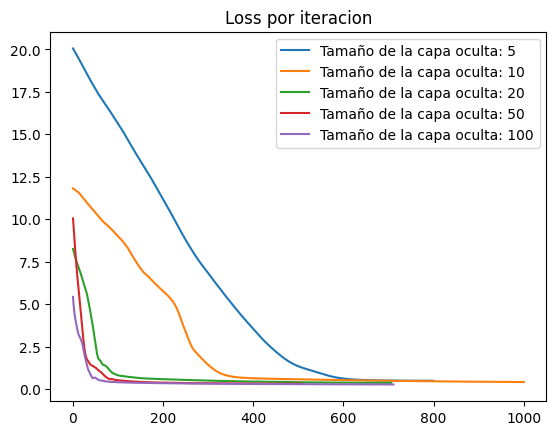

In [66]:
plt.plot(iteration,mlp.loss_curve_),plt.title('Loss por iteracion')
plt.plot(iteration2,mlp2.loss_curve_),plt.title('Loss por iteracion')
plt.plot(iteration3,mlp3.loss_curve_),plt.title('Loss por iteracion')
plt.plot(iteration4,mlp4.loss_curve_),plt.title('Loss por iteracion')
plt.plot(iteration5,mlp5.loss_curve_),plt.title('Loss por iteracion')
plt.legend(['Tamaño de la capa oculta: 5','Tamaño de la capa oculta: 10','Tamaño de la capa oculta: 20', 'Tamaño de la capa oculta: 50', 'Tamaño de la capa oculta: 100'])

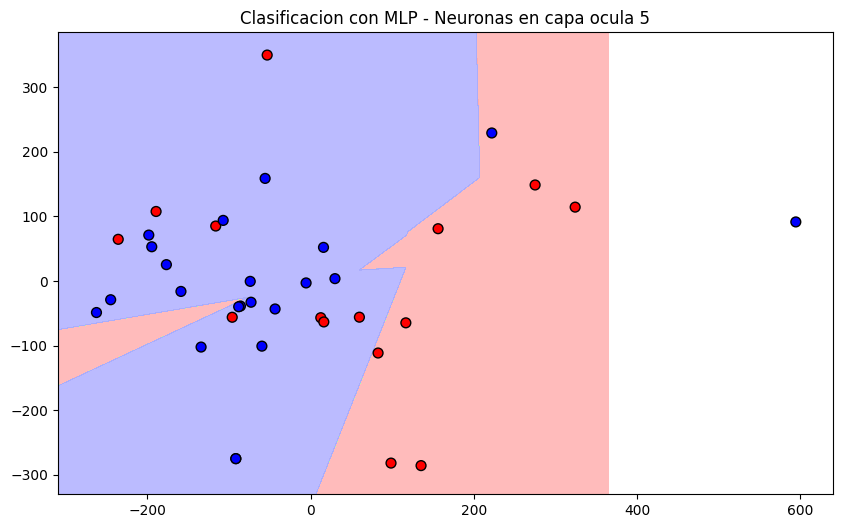

In [69]:

h = .2  # Tamaño del paso en la malla
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir en cada punto de la malla para graficar las áreas de decisión
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el gráfico
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test')

plt.title('Clasificacion con MLP - Neuronas en capa ocula 5')
plt.show()

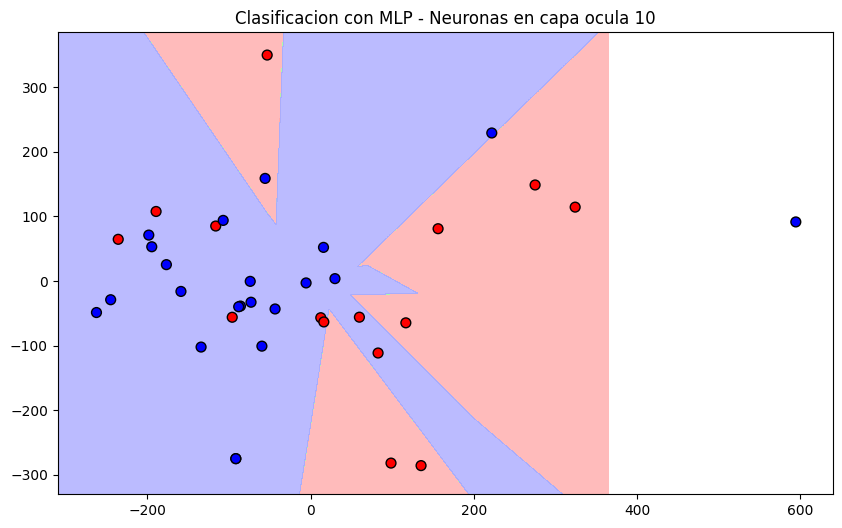

In [70]:
h = .2  # Tamaño del paso en la malla
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir en cada punto de la malla para graficar las áreas de decisión
Z = mlp2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el gráfico
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test')

plt.title('Clasificacion con MLP - Neuronas en capa ocula 10')
plt.show()

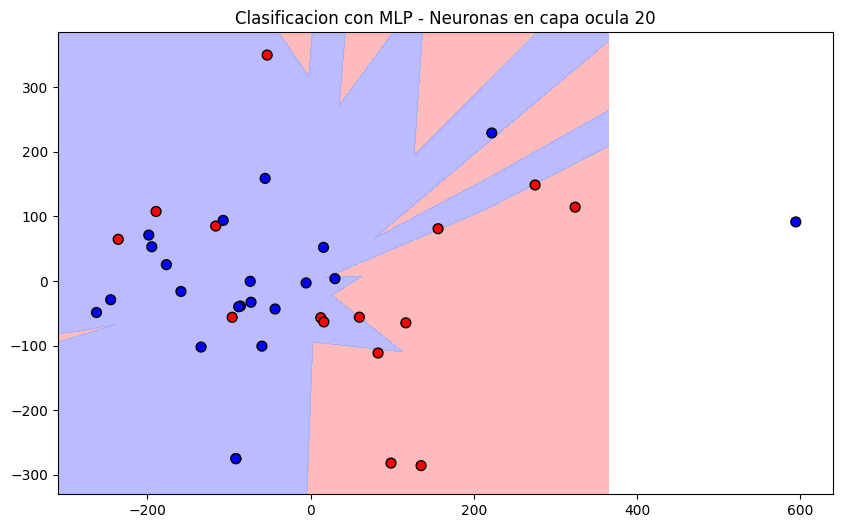

In [71]:
h = .2  # Tamaño del paso en la malla
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir en cada punto de la malla para graficar las áreas de decisión
Z = mlp3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el gráfico
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test')

plt.title('Clasificacion con MLP - Neuronas en capa ocula 20')
plt.show()

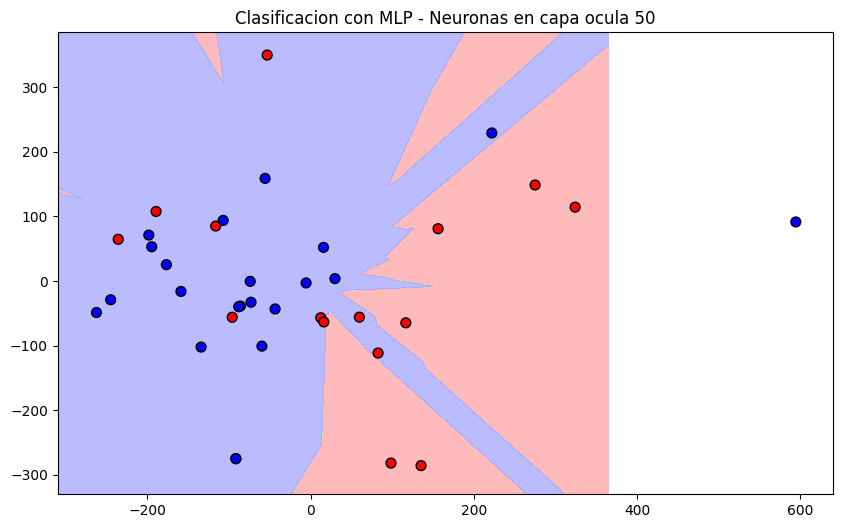

In [72]:
h = .2  # Tamaño del paso en la malla
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir en cada punto de la malla para graficar las áreas de decisión
Z = mlp4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el gráfico
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test')

plt.title('Clasificacion con MLP - Neuronas en capa ocula 50')
plt.show()

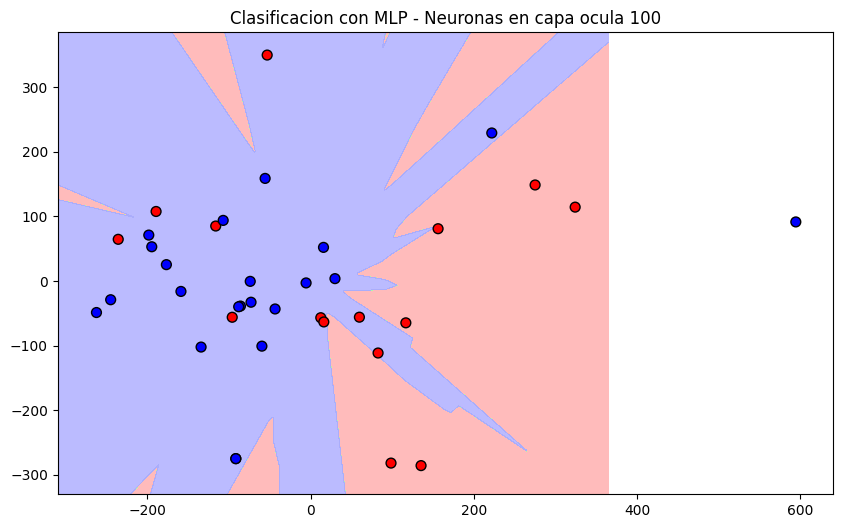

In [73]:
h = .2  # Tamaño del paso en la malla
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir en cada punto de la malla para graficar las áreas de decisión
Z = mlp5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el gráfico
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test')

plt.title('Clasificacion con MLP - Neuronas en capa ocula 100')
plt.show()

### Conclusiones

- Al aumentar el numero de neuronas en la capa oculta del MLP se consigue reducir las perdidas de este significativamente, asi mismo se disminuyen el numero de iteraciones requeridas para llegar a una convergencia en las perdidas.
- En el caso de este dataset, al aumentar la cantidad de neuronas de la capa oculta no se aumenta significativamente la precision del modelo del MLP.
- Modificar el numero de neuronas de la capa oculta puede modificar en gran manera las regiones de desicion lo que segun el caso podria cambiar la prediccion del modelo haciendo que esta pase de ser correcta a ser incorrecta o viceversa.